<a href="https://colab.research.google.com/github/pincha673/notes/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Exploratory Data Analysis***

In [168]:
import pandas as pd                                                                 #import librarires
import numpy as np
import matplotlib.pyplot as plt                                                                               

In [119]:
from google.colab import files
uploaded = files.upload()

Saving data_clean.csv to data_clean (3).csv


In [121]:
data = pd.read_csv('data_clean.csv', index_col =0)                               # one extra column(unnamed) is removed and one column is set for index

In [122]:
data

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S


In [123]:
data.head()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67,5,1,2010,67,S
2,36.0,118.0,8.0,72,5,2,2010,72,C
3,12.0,149.0,12.6,74,5,3,2010,74,PS
4,18.0,313.0,11.5,62,5,4,2010,62,S
5,NaN,NaN,14.3,56,5,5,2010,56,S


In [124]:
data.tail()

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
154,41.0,190.0,7.4,67,5,1,2010,67,C
155,30.0,193.0,6.9,70,9,26,2010,70,PS
156,NaN,145.0,13.2,77,9,27,2010,77,S
157,14.0,191.0,14.3,75,9,28,2010,75,S
158,18.0,131.0,8.0,76,9,29,2010,76,C


In [125]:
data.info()                                                                     # information about the data            

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


In [126]:
data.shape                                                                      #total columns and rows

(158, 9)

In [127]:
data.dtypes                                                                       #data types

Ozone      float64
Solar.R    float64
Wind       float64
Temp C      object
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [128]:
data.describe()                                                                  # statistical value of the data

,Ozone,Solar.R,Wind,Day,Year,Temp
count,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


# ***Correct the dtypes***

In [129]:
data['Month'] = pd.to_numeric(data['Month'],errors = 'coerce')                  # to change the dtype of month and along with replace the object as NA    

In [130]:
data['Temp C'] = pd.to_numeric(data['Temp C'], errors = 'coerce')               # to change the dtype of Temp and replace the wrong object with NA

In [131]:
data['Weather'] = data['Weather'].astype('category')                            # to change the wether as a category   

In [132]:
data.dtypes                                                                     # checked the data types again

Ozone       float64
Solar.R     float64
Wind        float64
Temp C      float64
Month       float64
Day           int64
Year          int64
Temp          int64
Weather    category
dtype: object

# ***Duplicates***

In [133]:
data.duplicated()                                                                # to check the duplicated values in the data

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [134]:
data[data.duplicated()].shape                                                   # To check the rows and columns of the duplicated entery

(1, 9)

In [135]:
data_cleaned1 = data.drop_duplicates()                                           # the duplictaes row and columns will be removed

In [136]:
data_cleaned1

,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,67.0,5.0,1,2010,67,S
2,36.0,118.0,8.0,72.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,74.0,5.0,3,2010,74,PS
4,18.0,313.0,11.5,62.0,5.0,4,2010,62,S
5,NaN,NaN,14.3,56.0,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,68.0,9.0,30,2010,68,S
154,41.0,190.0,7.4,67.0,5.0,1,2010,67,C
155,30.0,193.0,6.9,70.0,9.0,26,2010,70,PS
156,NaN,145.0,13.2,77.0,9.0,27,2010,77,S


# ***Drop Column***

In [137]:
data_cleaned2 = data_cleaned1.drop('Temp C',axis=1)

In [138]:
data_cleaned2

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30,2010,68,S
154,41.0,190.0,7.4,5.0,1,2010,67,C
155,30.0,193.0,6.9,9.0,26,2010,70,PS
156,NaN,145.0,13.2,9.0,27,2010,77,S


# ***Rename the columns***

In [139]:
data_cleaned3 = data_cleaned2.rename({'Solar.R': 'Solar'},axis=1)

In [140]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5.0,1,2010,67,S
2,36.0,118.0,8.0,5.0,2,2010,72,C
3,12.0,149.0,12.6,5.0,3,2010,74,PS
4,18.0,313.0,11.5,5.0,4,2010,62,S
5,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9.0,30,2010,68,S
154,41.0,190.0,7.4,5.0,1,2010,67,C
155,30.0,193.0,6.9,9.0,26,2010,70,PS
156,NaN,145.0,13.2,9.0,27,2010,77,S


# ***Missing Values and Imputation***

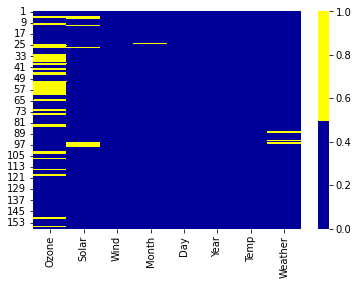

In [141]:
import seaborn as sns
cols = data_cleaned3 . columns
colours = ['#000099','#ffff00']                                                 # specific colour Yellow = is mising and Blue -Not Missing
sns.heatmap(data_cleaned3[cols].isnull(),
            cmap = sns.color_palette(colours))

In [142]:
data_cleaned3[data_cleaned3.isnull().any(axis=1)].head()                          #show NAN rows and columns

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
5,NaN,NaN,14.3,5.0,5,2010,56,S
6,28.0,NaN,14.9,5.0,6,2010,66,C
10,NaN,194.0,8.6,5.0,10,2010,69,S
11,7.0,NaN,6.9,5.0,11,2010,74,C
24,32.0,92.0,12.0,NaN,24,2010,61,C


In [143]:
data_cleaned3.isnull().sum()                                                    #counts of NAN

Ozone      38
Solar       7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

# ***Imputation Numerical***

In [144]:
mean=data_cleaned3['Ozone'].mean()

In [145]:
mean

41.81512605042017

In [146]:
data_cleaned3['Ozone']=data_cleaned3['Ozone'].fillna(mean)                      #  Replace mean in the place of NAN in Ozone

In [147]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.000000,190.0,7.4,5.0,1,2010,67,S
2,36.000000,118.0,8.0,5.0,2,2010,72,C
3,12.000000,149.0,12.6,5.0,3,2010,74,PS
4,18.000000,313.0,11.5,5.0,4,2010,62,S
5,41.815126,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.000000,223.0,11.5,9.0,30,2010,68,S
154,41.000000,190.0,7.4,5.0,1,2010,67,C
155,30.000000,193.0,6.9,9.0,26,2010,70,PS
156,41.815126,145.0,13.2,9.0,27,2010,77,S


In [148]:
data_cleaned3.isnull().sum()                                                    # No NAN is seen in ozone

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

# ***Imputation for Categorical***

In [149]:
obj_columns = data_cleaned3[['Weather']]

In [150]:
obj_columns.isnull().sum()                                                       # 3 NAN values in weather

Weather    3
dtype: int64

In [151]:
obj_columns= obj_columns.fillna(obj_columns.mode().iloc[0])                      #replce mode with NAN

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


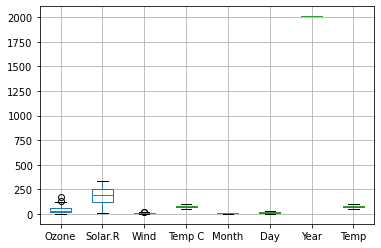

In [152]:
data.boxplot()

In [153]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
1,41.000000,190.0,7.4,5.0,1,2010,67,S
2,36.000000,118.0,8.0,5.0,2,2010,72,C
3,12.000000,149.0,12.6,5.0,3,2010,74,PS
4,18.000000,313.0,11.5,5.0,4,2010,62,S
5,41.815126,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.000000,223.0,11.5,9.0,30,2010,68,S
154,41.000000,190.0,7.4,5.0,1,2010,67,C
155,30.000000,193.0,6.9,9.0,26,2010,70,PS
156,41.815126,145.0,13.2,9.0,27,2010,77,S


In [154]:
obj_columns.shape

(157, 1)

In [155]:
obj_columns.isnull().sum()                                                      # No NAN values in the obj_columns

Weather    0
dtype: int64

In [156]:
data_cleaned4 = data_cleaned3.drop(['Weather'],axis=1,inplace=True)              #drop the Old weather and replace the ob_column

In [157]:
data_cleaned4 = pd.concat([data_cleaned3,obj_columns],axis=1)                   # join the data using CONCAT

In [158]:
data_cleaned4.isnull().sum()

Ozone      0
Solar      7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    0
dtype: int64

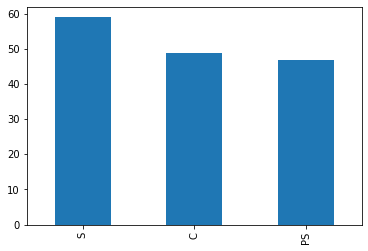

In [161]:
#Bar plot
data['Weather'].value_counts().plot.bar()                     #all bars are distributed equally then no need to remove the bar

# ***Outliers***

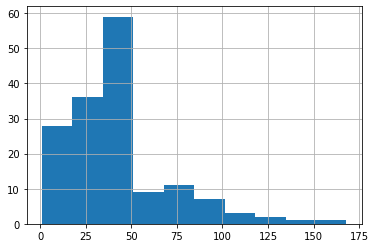

In [163]:
#histogram
data_cleaned3['Ozone'].hist()                          # ozone histogram it is right skewed

In [169]:
#box plot
data_box = data_cleaned3.dropna()                     #dropping Null values
data1_box =data_box.Ozone                              # Only taking Ozone box


{'whiskers': [<matplotlib.lines.Line2D at 0x7fe212988990>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe21298d410>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe212988450>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe21298de90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fe212996410>],
 'means': []}

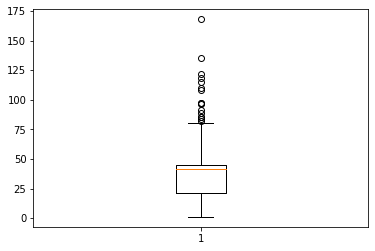

In [171]:
plt.boxplot(data1_box)                                    #box plot for ozone

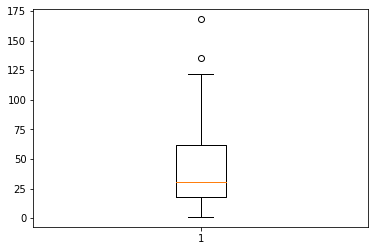

In [172]:
box = plt.boxplot(data['Ozone'].dropna())            # again filtering the boxplot         

In [174]:
type(box)                                           # it will print drop all items of boxplot one by one
for i,j in box.items():
  print(i,j)

whiskers [<matplotlib.lines.Line2D object at 0x7fe2128d7dd0>, <matplotlib.lines.Line2D object at 0x7fe2128d4350>]
caps [<matplotlib.lines.Line2D object at 0x7fe2128d4890>, <matplotlib.lines.Line2D object at 0x7fe2128d4dd0>]
boxes [<matplotlib.lines.Line2D object at 0x7fe2128d7850>]
medians [<matplotlib.lines.Line2D object at 0x7fe2128df390>]
fliers [<matplotlib.lines.Line2D object at 0x7fe2128df8d0>]
means []


In [177]:
[item.get_ydata() for item in box['fliers']]         # fliers means outliers ; Caps -exterems 

[array([135., 168.])]

In [178]:
#now for whiskers
[item.get_ydata() for item in box['whiskers']]       #to draw whiskers

[array([18.,  1.]), array([ 61.5, 122. ])]

In [179]:
#Descrpitive stats
data_cleaned3['Ozone'].describe()

count    157.000000
mean      41.815126
std       28.404353
min        1.000000
25%       21.000000
50%       41.815126
75%       45.000000
max      168.000000
Name: Ozone, dtype: float64

In [180]:
data_cleaned3

,Ozone,Solar,Wind,Month,Day,Year,Temp
1,41.000000,190.0,7.4,5.0,1,2010,67
2,36.000000,118.0,8.0,5.0,2,2010,72
3,12.000000,149.0,12.6,5.0,3,2010,74
4,18.000000,313.0,11.5,5.0,4,2010,62
5,41.815126,NaN,14.3,5.0,5,2010,56
...,...,...,...,...,...,...,...
153,20.000000,223.0,11.5,9.0,30,2010,68
154,41.000000,190.0,7.4,5.0,1,2010,67
155,30.000000,193.0,6.9,9.0,26,2010,70
156,41.815126,145.0,13.2,9.0,27,2010,77
